## プロ野球選手のデータセット

- Rによる統計的学習入門, 朝倉書店, 2018.<br>
An Introduction to Statistical Learning with Applications in R, Springer, 2017.<br>
https://www.statlearning.com<br>
https://cran.r-project.org/web/packages/ISLR/index.html

<hr>

## クラスタリングによる選手の分析

- Hits: 年間ヒット数
- Errors: 年間エラー数
- Years: 在籍年数

から選手の分類を試みる。

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# matplotlib: 日本語フォントの設定（MacOS）
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 
                               'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

In [3]:
hitters = pd.read_csv('data/Hitters.csv')
# 欠損値 NaN の個数
print("欠損値の個数：")
print(hitters.isna().sum())
# 欠損値 NaN を含む行の除去
hitters = hitters.dropna()
# 確認
hitters.head(2)

欠損値の個数：
Name          0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A


使用するデータ
- Hits: 年間ヒット数
- Errors: 年間エラー数
- Years: 在籍年数

In [4]:
# 使用する列だけ取り出す
df = hitters[['Hits', 'Errors', 'Years']]
# データの標準化
sc = StandardScaler()
sc.fit(df)
X = pd.DataFrame(sc.transform(df), index=df.index, columns=df.columns)
# 確認
X.head(2)

,Hits,Errors,Years
1,-0.595675,0.213352,1.397893
2,0.492260,0.819964,-0.901200


In [5]:
# 統計量をまとめて表示
pd.options.display.float_format = '{:.4f}'.format
X.describe()

,Hits,Errors,Years
count,263.0000,263.0000,263.0000
mean,0.0000,0.0000,-0.0000
std,1.0019,1.0019,1.0019
min,-2.3719,-1.3032,-1.3192
25%,-0.8066,-0.8482,-0.6922
50%,-0.1072,-0.2416,-0.2742
75%,0.7476,0.6683,0.5619
max,2.8902,3.5497,3.4880


## ヒートマップ


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


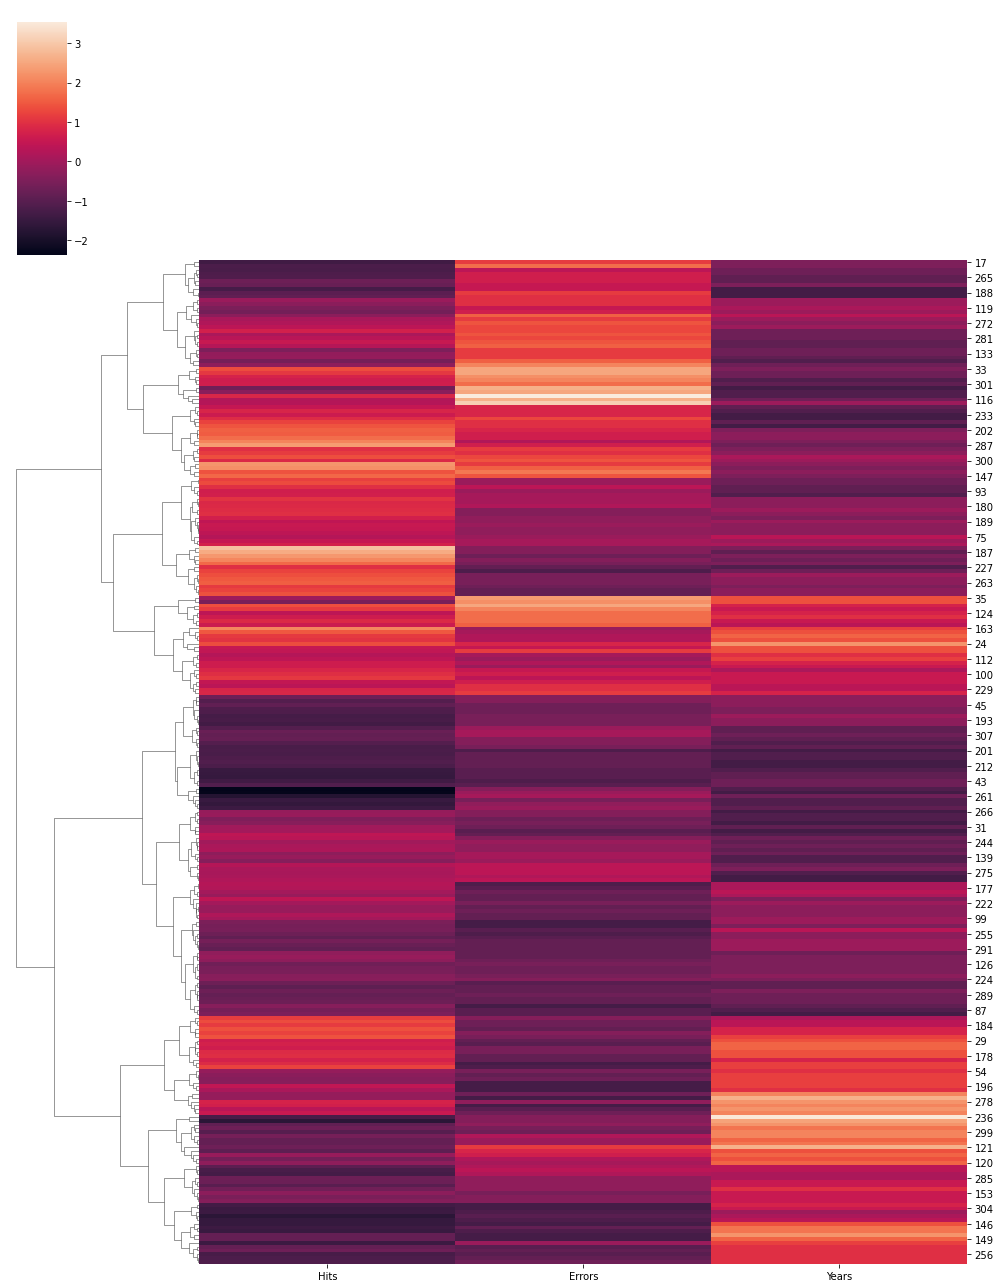

In [8]:
# ヒートマップ付きの樹形図を作成
sns.clustermap(
    X, method='ward', metric='euclidean', figsize=(14, 18), col_cluster=False
)

## クラスタ数の推定

- エルボー法
- シルエット分析

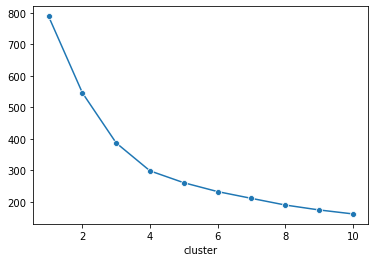

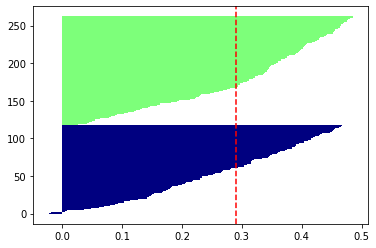

2 Clusters: Average silhouette width: 0.291


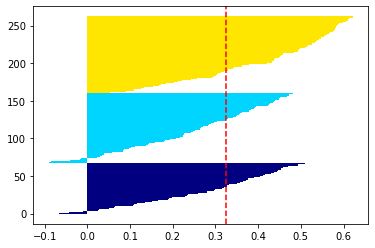

3 Clusters: Average silhouette width: 0.325


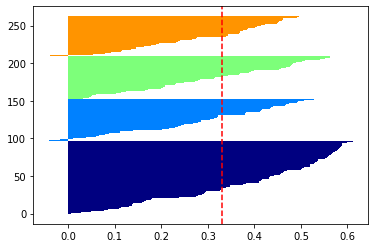

4 Clusters: Average silhouette width: 0.331


In [11]:
# エルボー法
# https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch11/ch11.py
distortions = []
for n in range(1, 11):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(X)
    distortions.append(model.inertia_)

sns.lineplot(x=range(1, 11), y=distortions, marker='o')
plt.xlabel('cluster')
plt.show()

# シルエット分析
# https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch11/ch11.py
from sklearn.metrics import silhouette_samples
from matplotlib import cm

def silhouette(n):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(X)
    cluster_labels = set(model.labels_)
    n_clusters = len(cluster_labels)
    silhouette_vals = silhouette_samples(X, model.labels_, metric='euclidean')
    y_lower, y_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[model.labels_ == c]
        c_silhouette_vals.sort()
        y_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_lower, y_upper), c_silhouette_vals, height=1.0,
                 edgecolor='none', color=color)
        yticks.append((y_lower + y_upper) / 2.)
        y_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.show()
    print('{} Clusters: Average silhouette width: {:.3f}'.format(n, silhouette_avg))

for n in range(2, 5):
    silhouette(n)

<hr>

## クラスタリング結果の解釈


### 散布図

クラスタ番号で色分け (hue) し、X, Y軸の組み合わせを変えて見てみる。

### クラスタ別の在籍年数

- ヒストグラム
- クロス集計
- ヒートマップ

### クラスタ別のヒット数

- ヒストグラム
- クロス集計
- ヒートマップ